In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [58]:
df = pd.read_csv('HRDataset.csv', dtype={'EmpID': 'Int64', 'ManagerID': 'Int64'})
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1103024456,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1106026572,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1302053333,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1211050782,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1307059817,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [59]:
df.isnull()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
397,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
398,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
399,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<AxesSubplot:>

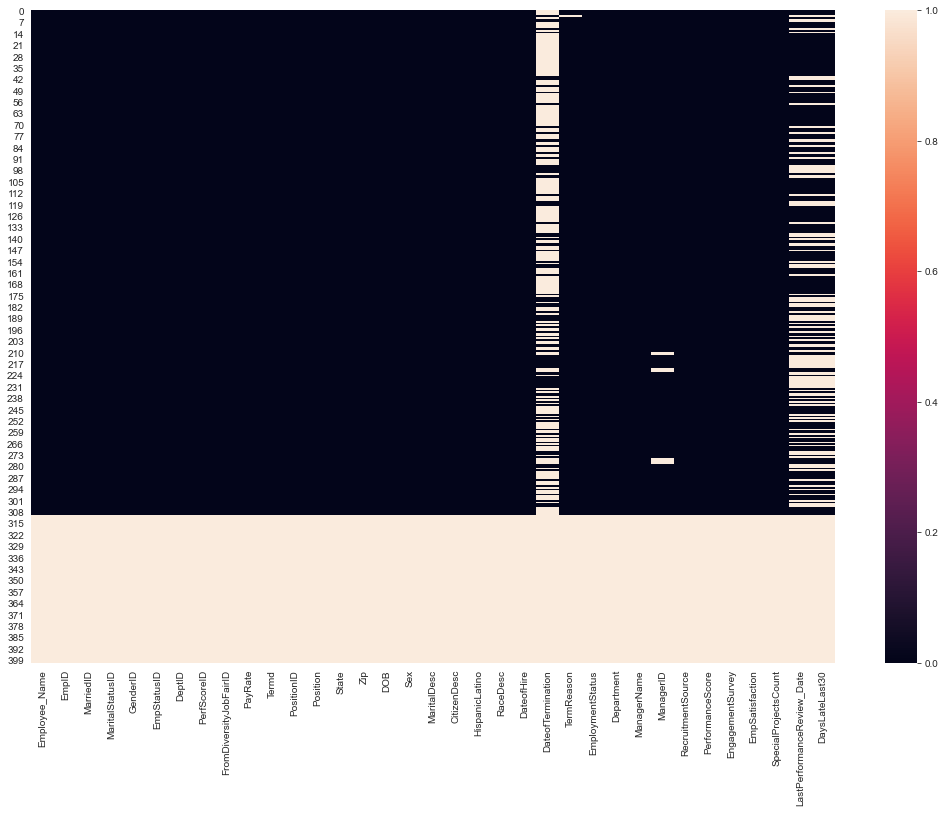

In [60]:
plt.figure(figsize=(18,12))
sns.heatmap(df.isnull())

In [61]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)

<AxesSubplot:>

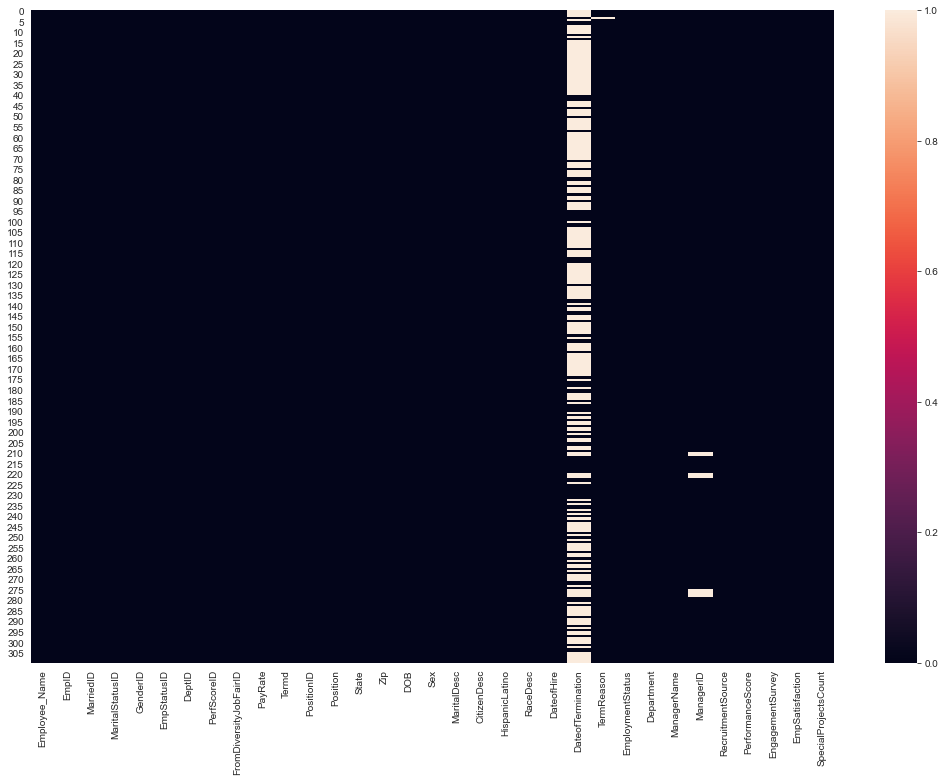

In [62]:
plt.figure(figsize=(18,12))
sns.heatmap(df.isnull())

In [63]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [64]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015


In [65]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')

In [66]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


#### 1.Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [67]:
sns.set_style('darkgrid')

In [68]:
len(df.ManagerID.dropna().unique())

23

In [69]:
len(df.ManagerName.dropna().unique())

21

In [70]:
managers = (
    df.groupby(['ManagerName','ManagerID'])
    .EmpID.count()
    .to_frame()
)
managers

EmpID
ManagerName        ManagerID       
Alex Sweetwater    10             9
Amy Dunn           11            21
Board of Directors 9              2
Brandon R. LeBlanc 1              6
                   3              1
Brannon Miller     12            21
Brian Champaigne   13             8
David Stanley      14            21
Debra Houlihan     15             3
Elijiah Gray       16            22
Eric Dougall       6              4
Janet King         2             19
Jennifer Zamora    5              7
John Smith         17            14
Kelley Spirea      18            22
Ketsia Liebig      19            21
Kissy Sullivan     20            22
Lynn Daneault      21            13
Michael Albert     22            21
                   30             1
Peter Monroe       7             14
Simon Roup         4             17
Webster Butler     39            13

<AxesSubplot:xlabel='ManagerName'>

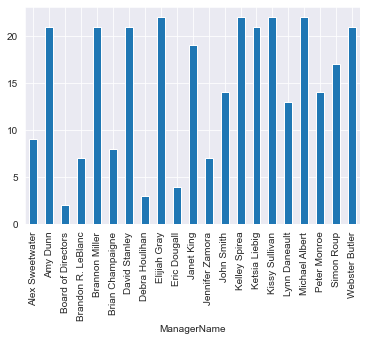

In [71]:
df.groupby('ManagerName')['EmpID'].count().plot(kind='bar')

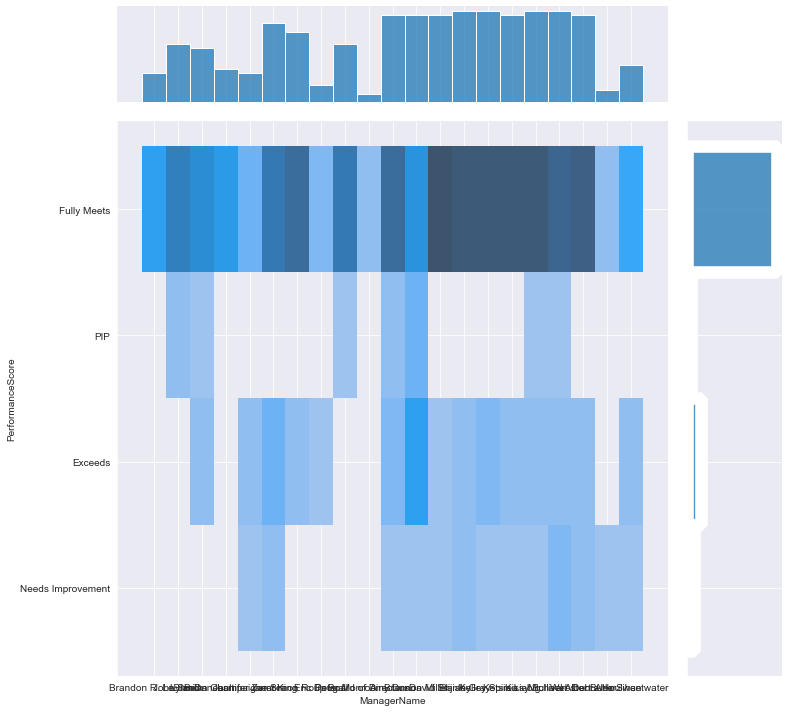

In [72]:
x = len(df.ManagerName.dropna().unique())
y = len(df.PerformanceScore.dropna().unique())
diagram = sns.jointplot(x='ManagerName',y='PerformanceScore',data=df, height=10, kind='hist', bins=x, marginal_kws={'bins': y})
plt.xticks(rotation=90)
diagram

Managerowie: Brandon R. LeBlanc, Brian Champaigne, Simon Roup, Board of Directors, David Stanley, Elijah Gray, Kelley Spinea, Ketsia Liebig, Kissy Sullivan i Webster Butler pozytywnie oceniają swój zespół. Oceny pozostałych managerów rozkładają się bardziej równomiernie na ich pracowników jeśli chodzi o 4-stopniową skalę oceny (Fully Meets, PtP, Exceeds, Needs Improvement), bez bardzo wyraźnej przewagi na korzyść oceny Fully Meets.

#### 2.Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [73]:
def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [74]:
df['Seniority'] = (
    df.apply(lambda row: count_seniority(row),axis=1)
)

In [75]:
df[['DateofHire','DateofTermination','Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.916035
1,2014-01-06,NaT,5.722226
2,2014-09-29,NaT,4.993942
3,2015-02-16,2015-04-15,0.158799
4,2015-05-01,NaT,4.408030


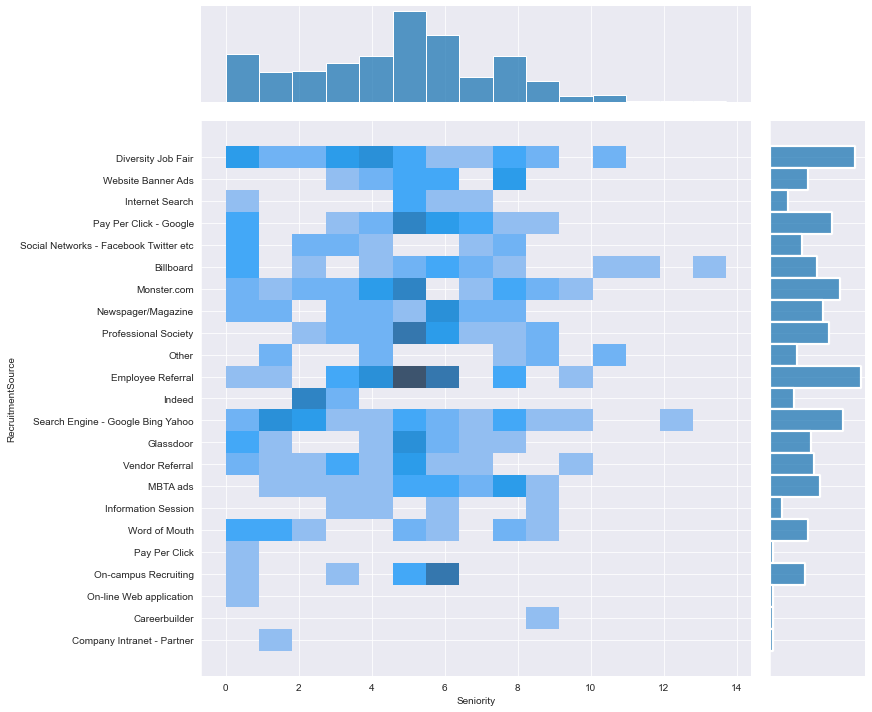

In [76]:
sns.jointplot(x='Seniority',y='RecruitmentSource',data=df, height=10, kind='hist')

Źródła pozyskania pracownika, względem najdłuższego stażu pracy:

Diversity Job Fair, Billboard, Search Engine - Google Bing Yahoo, Inne (Other)

#### 3.Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

In [77]:
df.MaritalDesc.unique()

array(['Married', 'Divorced', 'Single', 'Widowed', 'Separated'],
      dtype=object)

In [78]:
marital_status = (
    df.groupby(['MaritalStatusID', 'MaritalDesc'])
    .EmpID.count()
    .to_frame()
)
marital_status

,,EmpID
MaritalStatusID,MaritalDesc,
0.0,Single,137
1.0,Married,123
2.0,Divorced,30
3.0,Separated,12
4.0,Widowed,8


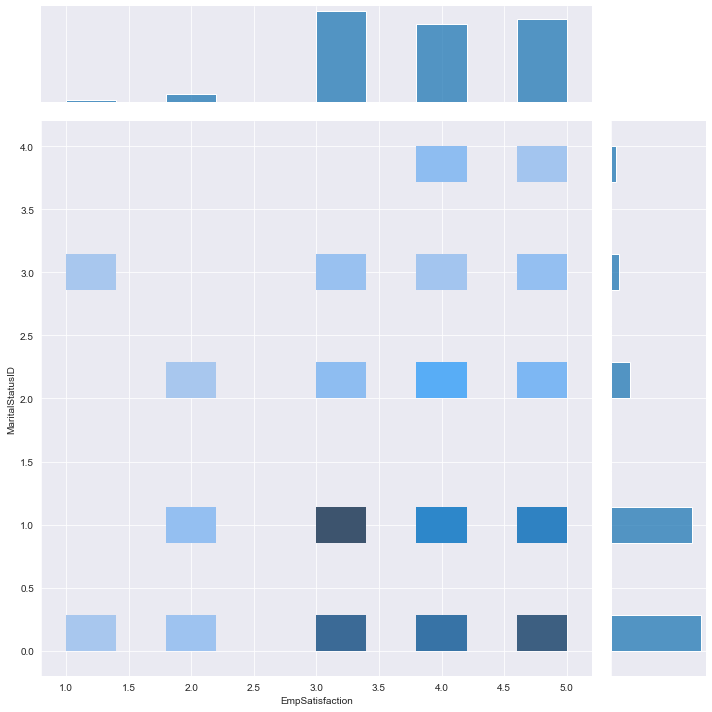

In [79]:
sns.jointplot(x='EmpSatisfaction',y='MaritalStatusID',data=df, height=10, kind='hist')

Największe zadowolenie z pracy wykazują osoby będące singlami, w małżeństwie oraz owdowiali. W przypadku osób rozwiedzionych oraz żyjących w seperacji zadowolenie i niezadowolenie z pracy jest podobne w obu grupach.

#### 4.Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [80]:
def count_age(row):

    now = pd.Timestamp('now')
    end_date = dt.datetime(2019,9,27)
    
    if row['DOB'] > now:   
        row['DOB'] = row['DOB'] - pd.DateOffset(years=100)
    
    return (end_date - row['DOB'])/np.timedelta64(1,'Y')

In [81]:
df['Age'] = (
    df.apply(lambda row: round(count_age(row), 0),axis=1)
)
df[['DOB','Age']].head()

,DOB,Age
0,1987-11-24,32.0
1,1984-04-26,35.0
2,1986-09-01,33.0
3,1985-09-16,34.0
4,1988-05-19,31.0


<AxesSubplot:xlabel='Termd', ylabel='Age'>

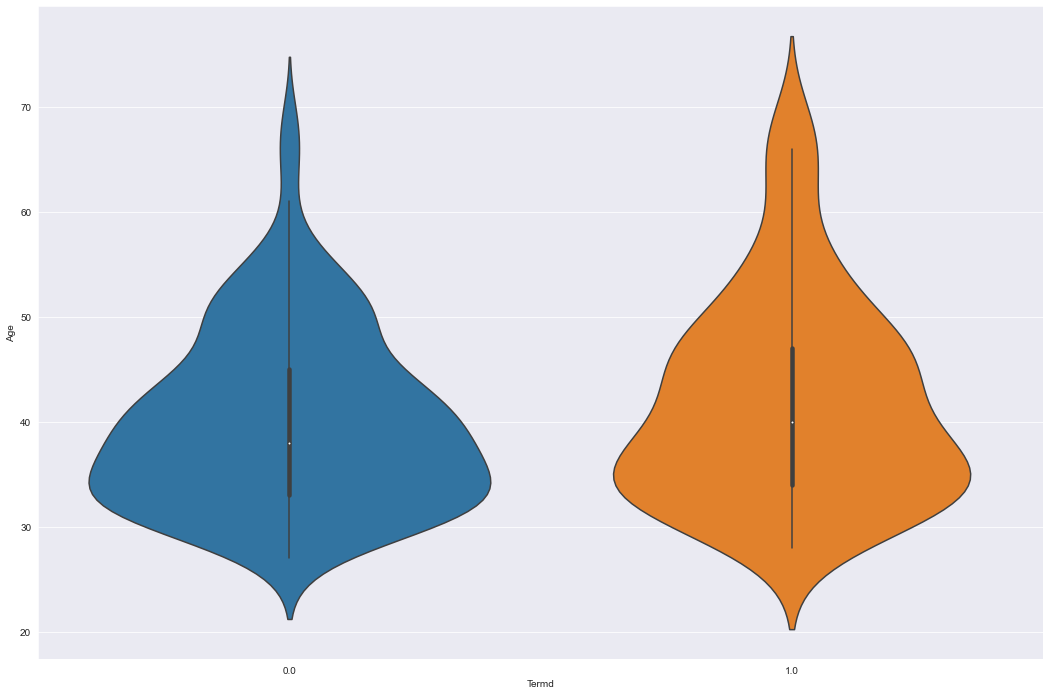

In [82]:
plt.figure(figsize=(18,12))
sns.violinplot(x='Termd',y='Age',data=df)

Wykres niebieski - osoby obecnie zatrudniowe. 
Wykres pomarańczowy - osoby niepracujące w firmie

Firma zatrudnia najwięcej osób w przedziale wiekowym 27-45 lat. Najstarszy pracownik ma 75 lat, a najmłodszy 22.
Średnia wieku w firmie to ok. 37 lat.

#### 5.Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

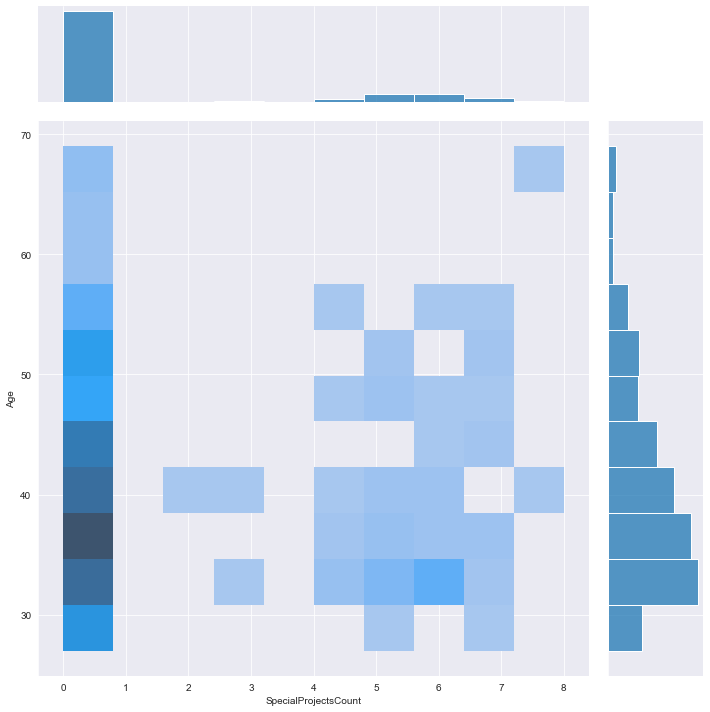

In [83]:
sns.jointplot(x='SpecialProjectsCount',y='Age',data=df, height=10, kind='hist')

Duża część pracowników zaangażowana jest w 1 projekt, zaś możemy zauwazyć grupę osób w wieku 25-40, którzy posiadają od 4 do 7 projektów. Można też zauważyć, że podobnie jak wspomniana grupa, osoby w wieku 50+ zajmują się większą liczbą projektów.